In [1]:

import pandas as pd
import numpy as np

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

import matplotlib.pyplot as plt

In [2]:
all_data = pd.read_csv('dataset_group.csv',header=None)
all_data

,0,1,2
0,2000-01-01,1,yogurt
1,2000-01-01,1,pork
2,2000-01-01,1,sandwich bags
3,2000-01-01,1,lunch meat
4,2000-01-01,1,all- purpose
...,...,...,...
22338,2002-02-26,1139,soda
22339,2002-02-26,1139,laundry detergent
22340,2002-02-26,1139,vegetables
22341,2002-02-26,1139,shampoo


In [3]:
unique_id = list(set(all_data[1]))
print(len(unique_id)) 

1139


In [4]:
items = list(set(all_data[2]))
print(len(items))

38


In [5]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in items] for id in unique_id]
pd.DataFrame(dataset)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,yogurt,pork,sandwich bags,lunch meat,all- purpose,flour,soda,butter,vegetables,beef,...,None,None,None,None,None,None,None,None,None,None
1,toilet paper,shampoo,hand soap,waffles,vegetables,cheeses,mixes,milk,sandwich bags,laundry detergent,...,None,None,None,None,None,None,None,None,None,None
2,soda,pork,soap,ice cream,toilet paper,dinner rolls,hand soap,spaghetti sauce,milk,ketchup,...,spaghetti sauce,pork,vegetables,cheeses,eggs,vegetables,vegetables,None,None,None
3,cereals,juice,lunch meat,soda,toilet paper,all- purpose,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,sandwich loaves,pasta,tortillas,mixes,hand soap,toilet paper,vegetables,vegetables,paper towels,vegetables,...,all- purpose,soda,yogurt,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,sugar,beef,sandwich bags,hand soap,paper towels,paper towels,all- purpose,beef,fruits,coffee/tea,...,beef,cereals,juice,poultry,sugar,soap,None,None,None,None
1135,coffee/tea,dinner rolls,lunch meat,spaghetti sauce,pasta,vegetables,cereals,dinner rolls,soap,milk,...,None,None,None,None,None,None,None,None,None,None
1136,beef,lunch meat,eggs,poultry,vegetables,tortillas,beef,beef,individual meals,dishwashing liquid/detergent,...,vegetables,pork,None,None,None,None,None,None,None,None
1137,sandwich bags,ketchup,milk,poultry,cheeses,soap,toilet paper,yogurt,beef,waffles,...,None,None,None,None,None,None,None,None,None,None


In [6]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


In [7]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) #добавлениеразмера набора
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


In [8]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
5,0.395961,(cereals)
6,0.390694,(cheeses)
7,0.379280,(coffee/tea)
8,0.388938,(dinner rolls)
9,0.388060,(dishwashing liquid/detergent)


In [9]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
results

,support,itemsets,length
38,0.310799,"(vegetables, aluminum foil)",2
39,0.300263,"(bagels, vegetables)",2
40,0.310799,"(cereals, vegetables)",2
41,0.309043,"(vegetables, cheeses)",2
42,0.308165,"(vegetables, dinner rolls)",2
43,0.306409,"(dishwashing liquid/detergent, vegetables)",2
44,0.326602,"(vegetables, eggs)",2
45,0.302897,"(vegetables, ice cream)",2
46,0.309043,"(laundry detergent, vegetables)",2
47,0.311677,"(vegetables, lunch meat)",2


In [10]:
print('\nCount of result itemstes = ',len(results))


Count of result itemstes =  14


no more (4):  0.09000000000000001
no more (3):  0.17000000000000004
no more (2):  0.34


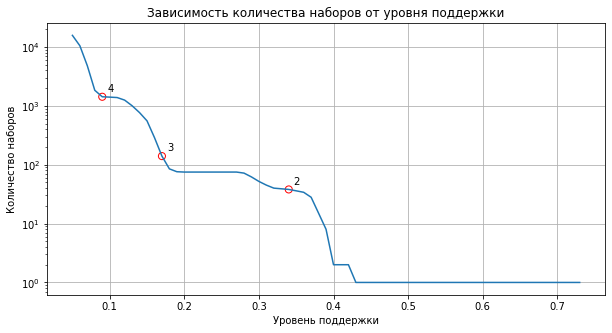

In [11]:
plt.figure(figsize=(10, 5))
plt.yscale("log", base=10)
plt.grid(True, axis="both")

min_supports = np.arange(0.05, 1, 0.01)
items_set_count = np.array([])
max_len_prev = None
for min_support in min_supports:
    results = apriori(df, min_support=min_support, use_colnames=True)
    results['length'] = results['itemsets'].apply(lambda x: len(x))
    
    max_len_curr = np.max(results['length'])
    if (np.isnan(max_len_curr)):
        break
    
    max_len_prev = max_len_prev if max_len_prev else max_len_curr
    items_set_count = np.append(items_set_count, len(results))

    if (max_len_prev != max_len_curr):
        print(f"no more ({max_len_prev}): ", min_support)
        plt.scatter(min_support, len(results), s=50, facecolors="None", edgecolors="r")
        plt.annotate(text=max_len_prev, xy=(min_support, len(results)), xytext=(5, 5), textcoords="offset pixels")
        max_len_prev = max_len_curr
    
plt.plot(min_supports[:len(items_set_count)], items_set_count)
plt.title('Зависимость количества наборов от уровня поддержки')
plt.xlabel('Уровень поддержки')
plt.ylabel('Количество наборов')
plt.show()

In [17]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in new_items] for id in unique_id]
new_dataset

[['yogurt',
  'lunch meat',
  'soda',
  'vegetables',
  'aluminum foil',
  'dinner rolls',
  'ice cream',
  'dinner rolls'],
 ['waffles',
  'vegetables',
  'cheeses',
  'milk',
  'dishwashing liquid/detergent',
  'waffles',
  'vegetables',
  'yogurt',
  'cereals',
  'vegetables',
  'aluminum foil'],
 ['soda',
  'ice cream',
  'dinner rolls',
  'milk',
  'poultry',
  'ice cream',
  'vegetables',
  'bagels',
  'ice cream',
  'lunch meat',
  'cereals',
  'vegetables',
  'cheeses',
  'eggs',
  'vegetables',
  'vegetables'],
 ['cereals', 'lunch meat', 'soda'],
 ['vegetables',
  'vegetables',
  'vegetables',
  'vegetables',
  'poultry',
  'eggs',
  'vegetables',
  'vegetables',
  'milk',
  'waffles',
  'vegetables',
  'dinner rolls',
  'soda',
  'yogurt'],
 ['eggs',
  'vegetables',
  'bagels',
  'dishwashing liquid/detergent',
  'cereals',
  'cereals',
  'bagels',
  'poultry',
  'bagels',
  'aluminum foil',
  'milk'],
 ['vegetables',
  'milk',
  'ice cream',
  'dishwashing liquid/detergent',

In [18]:
te = TransactionEncoder()
te_ary = te.fit_transform(new_dataset)
new_df = pd.DataFrame(te_ary, columns=te.columns_)
new_df

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [19]:
results = apriori(new_df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.384548,(aluminum foil)
1,0.385426,(bagels)
2,0.395961,(cereals)
3,0.390694,(cheeses)
4,0.388938,(dinner rolls)
5,0.388060,(dishwashing liquid/detergent)
6,0.389816,(eggs)
7,0.398595,(ice cream)
8,0.395083,(lunch meat)
9,0.380158,(milk)


In [20]:
results = apriori(new_df, min_support=0.15, use_colnames=True)
results = results[results['itemsets'].apply(lambda iset: len(iset) > 1 and ('yogurt' in iset or 'waffles' in iset))]
results

,support,itemsets
27,0.169447,"(waffles, aluminum foil)"
28,0.177349,"(yogurt, aluminum foil)"
40,0.159789,"(bagels, waffles)"
41,0.162423,"(bagels, yogurt)"
52,0.160667,"(cereals, waffles)"
53,0.172081,"(cereals, yogurt)"
63,0.172959,"(waffles, cheeses)"
64,0.172081,"(yogurt, cheeses)"
73,0.169447,"(dinner rolls, waffles)"
74,0.166813,"(yogurt, dinner rolls)"


In [22]:
diff_items = set(list(df)) - set(list(new_df))
diff_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in diff_items] for id in unique_id]
te = TransactionEncoder()
te_ary = te.fit_transform(diff_dataset)
diff_df = pd.DataFrame(te_ary, columns=te.columns_)
diff_df

,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False


In [23]:
results = apriori(diff_df, min_support=0.3, use_colnames=True)
results

,support,itemsets
0,0.374890,(all- purpose)
1,0.374890,(beef)
2,0.367867,(butter)
3,0.379280,(coffee/tea)
4,0.352941,(flour)
5,0.370500,(fruits)
6,0.345917,(hand soap)
7,0.375768,(individual meals)
8,0.376646,(juice)
9,0.371378,(ketchup)


In [24]:
results = apriori(df, min_support=0.1, use_colnames=True)
results = results[results['itemsets'].apply(lambda iset: len([item for item in iset if item.startswith('s')]) >= 2)]
results

,support,itemsets
675,0.137840,"(sandwich loaves, sandwich bags)"
676,0.146620,"(shampoo, sandwich bags)"
677,0.158911,"(sandwich bags, soap)"
678,0.162423,"(soda, sandwich bags)"
679,0.147498,"(sandwich bags, spaghetti sauce)"
680,0.131694,"(sugar, sandwich bags)"
686,0.150132,"(sandwich loaves, shampoo)"
687,0.158033,"(sandwich loaves, soap)"
688,0.141352,"(sandwich loaves, soda)"
689,0.150132,"(sandwich loaves, spaghetti sauce)"


In [25]:
results = apriori(df, min_support=0.1, use_colnames=True)
results = results[results['support'].apply(lambda sprt: sprt >= 0.1 and sprt <= 0.25)]
results

,support,itemsets
38,0.157155,"(all- purpose, aluminum foil)"
39,0.150132,"(all- purpose, bagels)"
40,0.144864,"(all- purpose, beef)"
41,0.147498,"(all- purpose, butter)"
42,0.151010,"(all- purpose, cereals)"
...,...,...
1401,0.135206,"(toilet paper, vegetables, waffles)"
1402,0.130817,"(toilet paper, vegetables, yogurt)"
1403,0.121159,"(waffles, vegetables, tortillas)"
1404,0.130817,"(yogurt, vegetables, tortillas)"
